### Récupération du dataset

In [45]:
import kagglehub as kh
import pandas as pd

# Télécharger le dataset dans un dossier local
dataset_ref = "uciml/red-wine-quality-cortez-et-al-2009"
path = kh.dataset_download(dataset_ref)

# Localiser le fichier CSV dans le dossier téléchargé
csv_file = f"{path}/winequality-red.csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file)



In [46]:
display(df)
df.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Gestion des doublons et valeurs manquantes

In [47]:
# Vérifier l'absence de doublons
print(df.duplicated().sum())

# Supprimer les doublons
df = df.drop_duplicates()

# Vérifier l'absence de valeurs nulles
print(df.isna().sum())

print(df.shape)

240
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
(1359, 12)


### Vérification de la validité des données

In [48]:
# Vérifier l'ensemble des valeurs distinctes pour les données catégorielles
print(df['quality'].value_counts())

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64


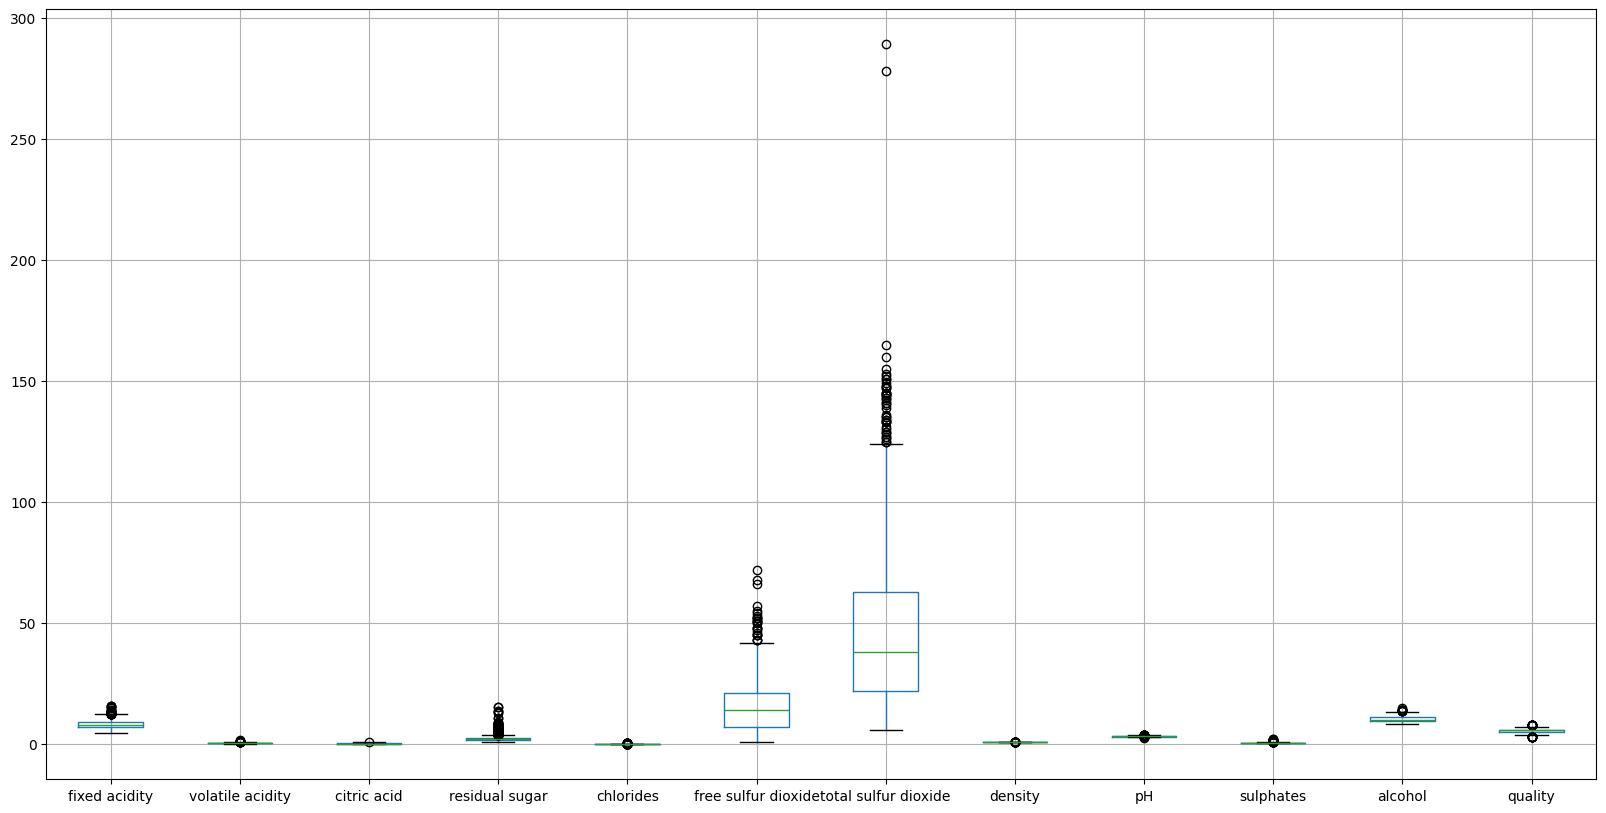

In [49]:
# Vérifier la distribution des données quantitatives avec des boxplots
import matplotlib.pyplot as plt
df.boxplot(column=df.columns.drop('quality').name, figsize=(20,10))
plt.show()
# Les données semblent cohérentes

### Exploration / analyse des relations entre les données

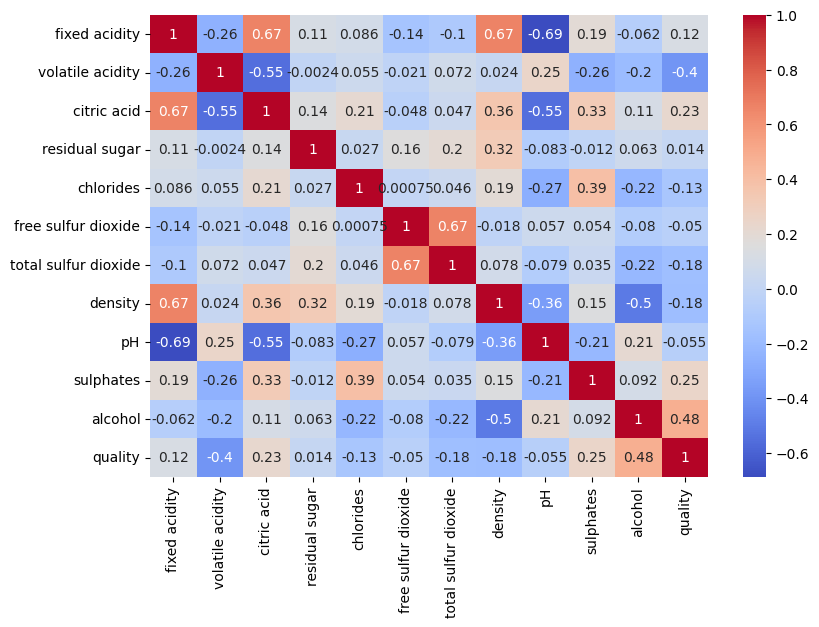

In [50]:
# Afficher avec Seaborn la heatmap des corrélations
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

# Les variables "alcohol" et "quality" semblent être les plus corrélées
# Les variables "volatile acidity" et "quality" semblent être les plus corrélées négativement

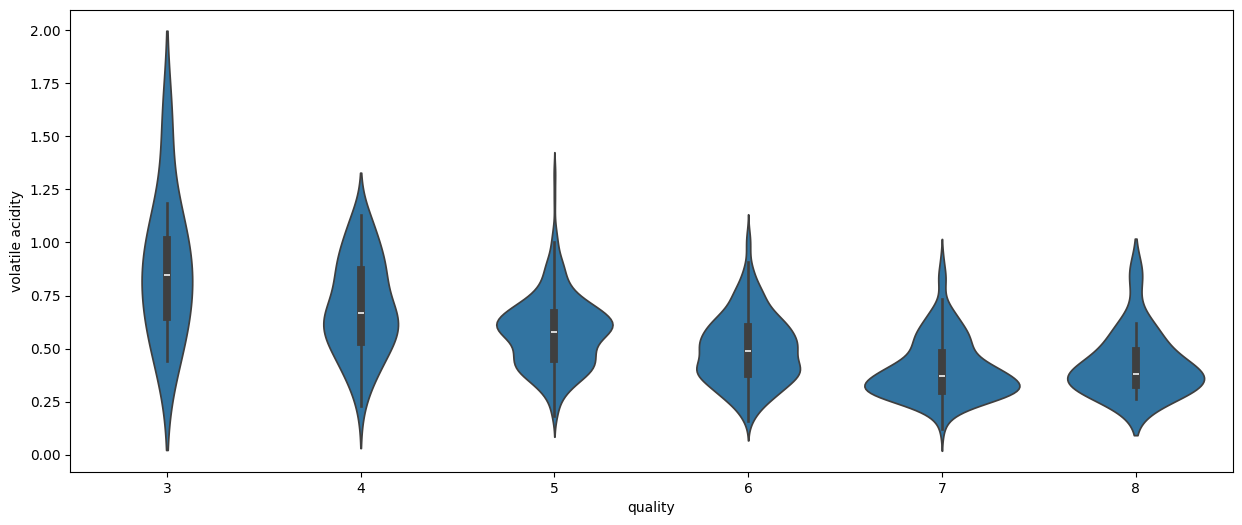

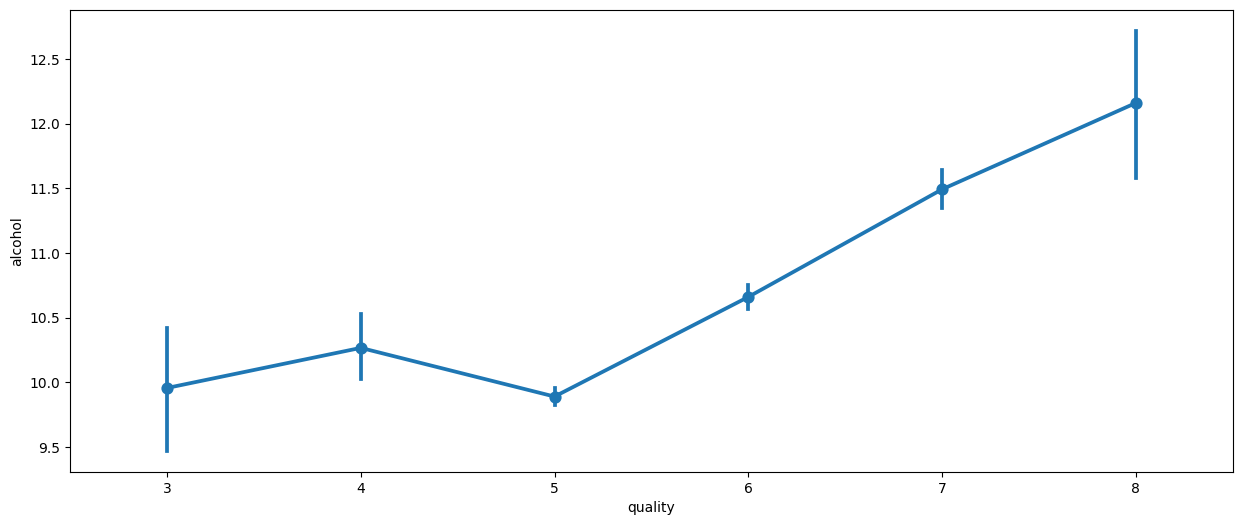

In [51]:
# Affichage d'un violinplot pour acidité volatile en fonction de la qualité
plt.figure(figsize=(15,6))
sns.violinplot(x='quality', y='volatile acidity', data=df)
plt.show()

# Affichage d'un point plot pour alcool en fonction de la qualité
plt.figure(figsize=(15,6))
sns.pointplot(x='quality', y='alcohol', data=df)
plt.show()

In [52]:
# On fait un test ANOVA pour vérifier si la variable "alcohol" est significativement différente en fonction de la qualité
import statsmodels.api as sm
result = sm.formula.ols('alcohol ~ quality', data=df).fit()
table = sm.stats.anova_lm(result)
display(table)

# La p-value est inférieure à 0.05, on rejette donc l'hypothèse nulle
# La variable "alcohol" est significativement différente en fonction de la qualité

# On fait un test ANOVA pour vérifier si la variable "volatile acidity" est significativement différente en fonction de la qualité
result = sm.formula.ols('Q("volatile acidity") ~ quality', data=df).fit()
table = sm.stats.anova_lm(result)
display(table)

# La p-value est inférieure à 0.05, on rejette donc l'hypothèse nulle
# La variable "volatile acidity" est significativement différente en fonction de la qualité

,df,sum_sq,mean_sq,F,PR(>F)
quality,1.0,366.867786,366.867786,407.00843,2.278721e-79
Residual,1357.0,1223.167751,0.901376,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
quality,1.0,7.105826,7.105826,251.189293,4.928194e-52
Residual,1357.0,38.387804,0.028289,NaN,NaN


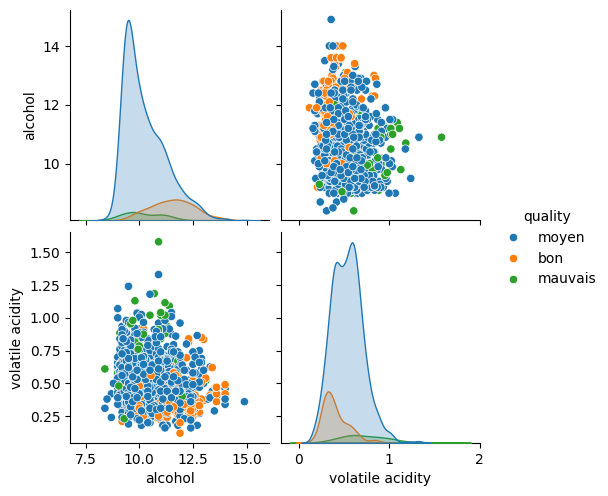

In [ ]:
# On affiche un pairplot pour visualiser les relations entre ces variables en fonction de la qualité
sns.pairplot(df[['alcohol','volatile acidity','quality']], hue='quality')
plt.show()
# On observe que la qualité est plus élevée lorsque l'alcool est plus élevé et que l'acidité volatile est plus faible
# Les classes de qualité semblent bien séparées pour ces deux variables

### Preprocessing

In [ ]:
# TODO Traitement spécifique avant séparation training / testing

In [ ]:
# Séparation features / target
X = df.drop(columns='quality')
y = df['quality']

# Séparation training / testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO Traitement spécifique après séparation training / testing

### Entraînement du modèle

In [ ]:
# TODO Entraîner le modèle

### Evaluation du modèle

In [ ]:
# TODO Prédire les classes sur le jeu de test
y_pred = None

# Afficher la matrice de confusion
display(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))

# Afficher l'accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Afficher le rapport de classification
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

### Bonus

In [ ]:
# TODO